<a href="https://colab.research.google.com/github/avnishcodes/iris-bagging-model/blob/main/iris_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
# Features and target
X = df.drop('species', axis=1)
y = df['species']


In [26]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=50, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = bagging_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


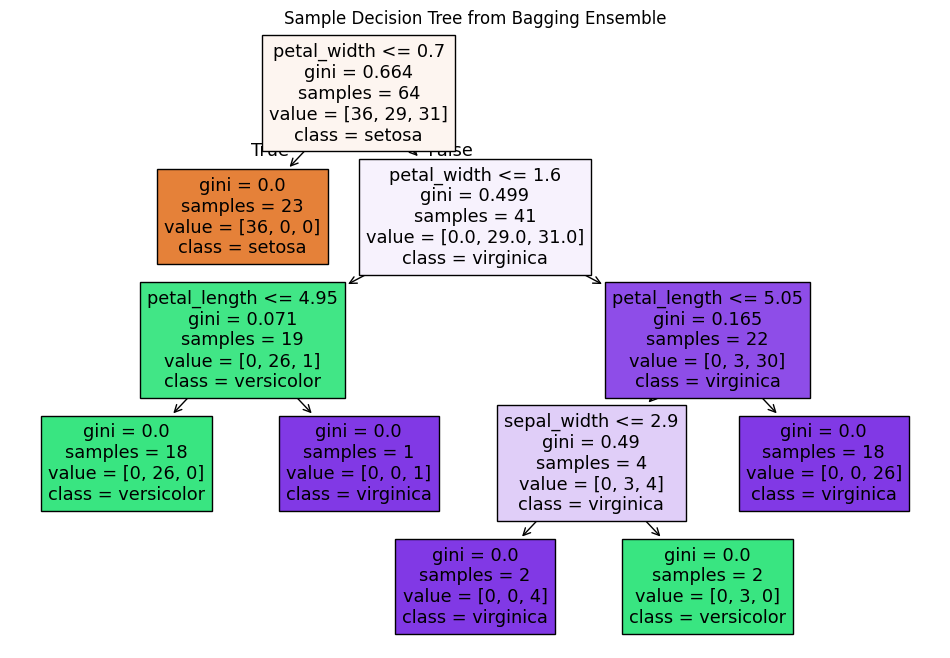

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first estimator in the bagging ensemble
plt.figure(figsize=(12, 8))
plot_tree(bagging_model.estimators_[0], feature_names=X.columns, class_names=bagging_model.classes_, filled=True)
plt.title("Sample Decision Tree from Bagging Ensemble")
plt.show()
